In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as sts

In [57]:
bankdf = pd.read_csv("new_train.csv")

In [116]:
uRows = bankdf.loc[bankdf['job'] != 'unknown']
uRows1 = uRows.loc[uRows['marital'] != 'unknown']
uRows2 = uRows1.loc[uRows1['education'] != 'unknown']
uRows3 = uRows2.loc[uRows2['default'] != 'unknown']
uRows4 = uRows3.loc[uRows3['housing'] != 'unknown']
cleandf = uRows4.loc[uRows4['loan']   != 'unknown']
cleandf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no


In [91]:
cleandf.corr()

,age,duration,campaign,pdays,previous
age,1.000000,0.005710,-0.003322,-0.051352,0.048255
duration,0.005710,1.000000,-0.072338,-0.045806,0.020937
campaign,-0.003322,-0.072338,1.000000,0.054767,-0.079834
pdays,-0.051352,-0.045806,0.054767,1.000000,-0.590070
previous,0.048255,0.020937,-0.079834,-0.590070,1.000000


In [92]:
married = cleandf[cleandf["marital"] == "married"]
divorced_widowed = cleandf[cleandf["marital"] == "divorced"]
single = cleandf[cleandf["marital"] == "single"]

married_home = married[married["housing"] == "yes"]
divorced_widowed_home = divorced_widowed[divorced_widowed["housing"] == "yes"]
single_home = single[single["housing"] == "yes"]

married_nohome = married[married["housing"] == "no"]
divorced_widowed_nohome = divorced_widowed[divorced_widowed["housing"] == "no"]
single_nohome = single[single["housing"] == "no"]

In [99]:
p_single_homes = len(single_home) / len(single)

married_and_divorced = len(married) + len(divorced_widowed)
married_and_divorced_home = len(married_home) + len(divorced_widowed_home)
married_and_divorced_nohome = len(married_nohome) + len(divorced_widowed_nohome)

p_married_divorced_homes = (len(married_home) + len(divorced_widowed_home))/married_and_divorced

Text(0.5, 1.0, 'Count of Marital Status')

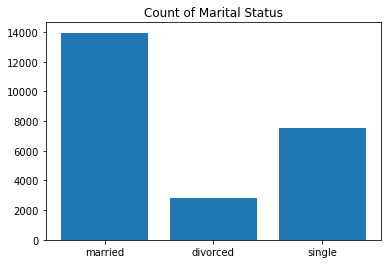

In [100]:
plt.bar(cleandf["marital"].unique() , [len(married), len(divorced_widowed), len(single)])
plt.title("Count of Marital Status")

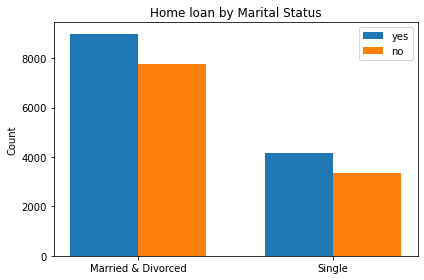

In [98]:
labels = ["Married & Divorced", "Single"]

home_info =[married_and_divorced_home, len(single_home)]
nohome_info = [married_and_divorced_nohome, len(single_nohome)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, home_info, width, label='yes')
rects2 = ax.bar(x + width/2, nohome_info, width, label='no')


# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Home loan by Marital Status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# **_Does being married or have been married affect whether or not the individual has a home loan?_**


**Our two samples:**

    sample_md - Married and Divorced/Widowed
    sample_s - Single
    
### Our null hypothesis is that the proportions from the two populations are the same.

### Our alternate is that the two proportions are different.

In [106]:
#condition checking for proportion test
# np1  = p_single_homes * len(single)
# print(np)
# np2  = p_married_divorced_homes * married_and_divorced
# print(np1)
# print(np2)

# following code found off https://sonalake.com/latest/hypothesis-testing-of-proportion-based-samples/ ** has been modified

significance = 0.5

sample_success_md, sample_size_md = (married_and_divorced_home, married_and_divorced)
sample_success_s, sample_size_s = (len(single_home), len(single))

successes = np.array([sample_success_md, sample_success_s])
samples = np.array([sample_size_md, sample_size_s])

stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

print('\nz_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
   print ("\nFail to reject the null hypothesis - we have nothing else to say")
else:
   print ("\nReject the null hypothesis - suggest the alternative hypothesis is true")

print("\nmarried & divorced/widow with housing loan proportion: ", p_married_divorced_homes)
print("single with housing loan proportion: ", p_single_homes, "\n")


z_stat: -2.305, p_value: 0.021

Reject the null hypothesis - suggest the alternative hypothesis is true

married & divorced/widow with housing loan proportion:  0.5370845515842234
single with housing loan proportion:  0.5530082162735224 

